Technical Process Summary
1. Video Acquisition
Recording: Footage captured in a sports gym featuring 4 ball-launching cannons.

Setup: Camera positioned to capture the player receiving the ball at 60 fps.

Duration: Videos last 3–4 seconds (240–249 frames per video).

2. Manual Video Labeling
Tool: Custom Python script using PyQt6 to create a manual labeling interface.

Methodology: Frame-by-frame labeling identifying touches with permitted body parts:

Right Foot (RightF)

Left Foot (LeftF)

Right Thigh (RightT)

Left Thigh (LeftT)

Chest (Chest)

Storage: Data saved in JSON files containing: touch class, frame number, and timestamp in milliseconds.

3. Object Detection and Pose Estimation with YOLOv8
YOLOv8x: Used for object detection (detecting people and balls).

YOLOv8m-pose: Used for pose estimation (17 body keypoints).

Processing: Frame-by-frame analysis of each video.

Tracking: Active ball and active player tracking via unique IDs.

4. Feature Extraction and Dataset Creation
Calculations: * Distances between the center of the ball and each specific body part.

Ratio between the person’s height and the ball’s height.

Data Augmentation: Label expansion (±3 frames around the actual touch).

Feature Matrix Generation:

distance_to_RF, distance_to_LF, distance_to_RT, distance_to_LT, distance_to_CH.

person_ball_H_rt (height ratio).

Encoding: One-hot encoding for output classes.

Export: Data saved to CSV files using pandas DataFrame structures.

5. Data Preparation and Processing
Normalization: Feature scaling using MinMaxScaler.

Windowing: Sliding window approach with a size of 50 frames.

Balancing: Undersampling of the majority class to handle class imbalance.

Splitting: Stratified split into Training (85%) and Testing (15%) sets.

Refinement: Class reduction to further optimize dataset balance.

6. Neural Network Design
Architecture: Deep Neural Network (DNN) incorporating:

Dense Layers: 128, 64 neurons.

Conv1D Layer: 64 filters, kernel size 21 (to extract local temporal patterns).

LSTM Layer: 24 units (to capture long-term temporal dependencies).

Final Dense Layers: 64, 32, 4 neurons.

Activation Functions: ReLU for intermediate layers, Softmax (or Sigmoid) for the output layer.

Optimizer: Adam (learning rate = 0.001).

Loss Function: Categorical Crossentropy.

7. Training and Validation
Callbacks: Training with Early Stopping (patience = 10).

Epochs: Maximum of 1000.

Batch Size: 1000.

Logging: Metrics recorded via CSVLogger.

Model Storage: Saved trained model in .h5 format.

8. Model Evaluation
Accuracy: Achieved 93% on the test set (3-class version).

Metrics: Generation of Confusion Matrices.

Analysis: Performance analysis per individual video.

Verification: Comparison of predictions vs. ground truth labels.

Tools and Libraries Used:
YOLOv8 (Ultralytics): Computer vision backbone.

PyQt6: Labeling interface.

OpenCV: Video processing.

Pandas: Data manipulation.

NumPy: Numerical operations.

TensorFlow/Keras: Model construction and training.

Scikit-learn: Preprocessing and evaluation metrics.

Matplotlib/Seaborn: Data visualization.

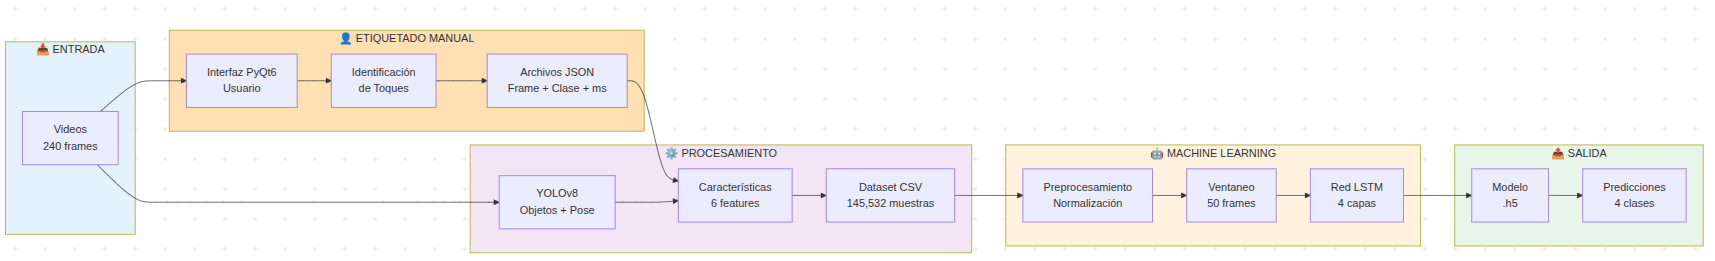

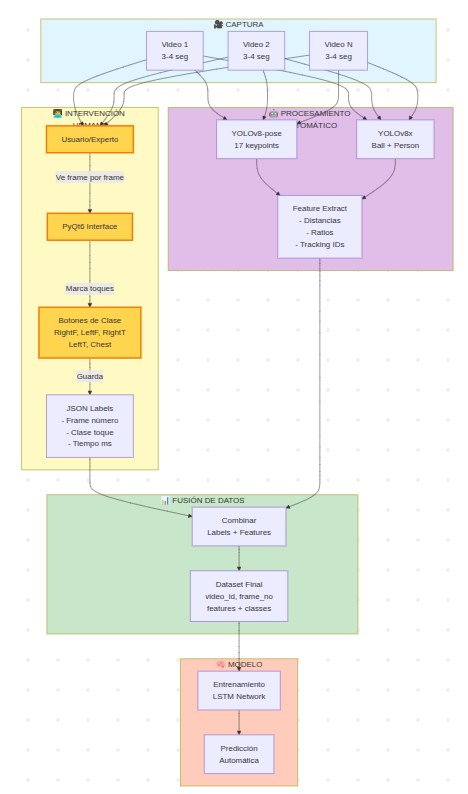

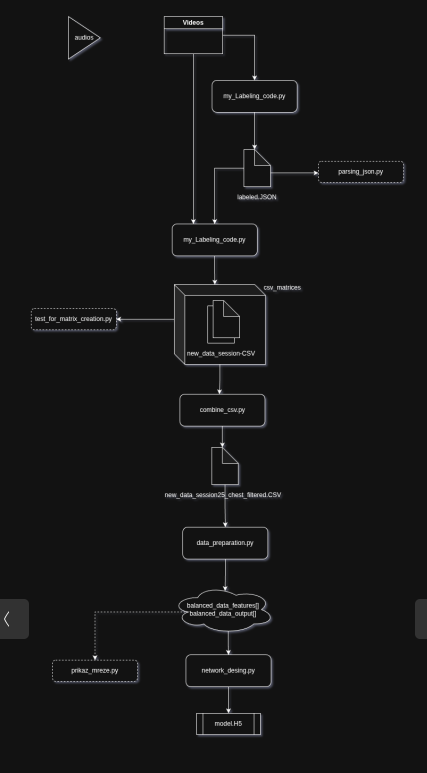

# Inference

Inference Process (Model Prediction)
The trained model cannot perform inference using a single raw image. Instead, it requires the input video or image sequence to undergo the exact same data processing stages as the training dataset. The Deep Sequential Neural Network only accepts a set of sequential numerical features as input.

The inference workflow for a new video or frame sequence is detailed below:

1. The Input Process for Inference
To generate a prediction, the model must receive a data array that encapsulates the spatial and temporal relationship between the ball and the player, using a sliding window structure.

A. Video Preprocessing (YOLOv8)
The input video is processed frame-by-frame using YOLOv8.

YOLOv8x/m-pose performs Object Detection (locating the ball) and Pose Estimation (identifying the 17 keypoints of the player's joints).

B. Feature Extraction and Engineering
From the coordinates and bounding boxes provided by YOLOv8, six (6) fundamental features are calculated for every frame:

Five (5) Distances: Distance between the center of the ball and the specific touch points (Right Foot, Left Foot, Right Thigh, Left Thigh, Chest).

One (1) Height Ratio (person_ball_H_rt): The ratio between the height of the person’s bounding box and the ball’s bounding box.

Normalization: These six features are scaled between 0 and 1 using the pre-fitted scaler (MinMaxScaler).

C. Temporal Sequencing (Sliding Window)
For the LSTM (Long Short-Term Memory) layer to process temporal dependencies, the features must be structured into sequences:

A sliding window of fifty (50) frames is applied.

Model Input: The final input is a 3D array representing a sequence of 50 frames, each containing 6 numerical features.

2. Model Output (Prediction)
The model predicts the classification for the final frame (the 50th frame) of the current sequence.

Nature of Output: The final layer uses a Sigmoid (or Softmax) activation function, returning a set of values representing the probability of each touch class occurring at that specific moment.

Predicted Classes:

Legs: Combines Right Foot, Left Foot, Right Thigh, and Left Thigh.

Chest: Direct chest control.

Other_F: Ball and player are present in the frame, but no touch is occurring.

Other_NF: Ball or player is missing from the frame.

Interpreted Result: The system identifies the specific frame where a touch occurs by selecting the class with the highest probability (decoded from one-hot format). This allows the system to count total touches within a single video session.

Summary
Inference involves passing a sequence of processed feature data (50 frames); the model then returns the probability of a touch occurring (and identifying the body part involved) for the last frame of that sequence.